# Notebook for generating figures in *Génelive!*

This notebook is for reproducing all figures related to experiments in our paper (GenéLive! Generating Rhythm Actions in Love Live!).

## Prerequisites

Please install following python packages in advance:

- `GPy`
- `matplotlib`
- `numpy`
- `pandas`
- `seaborn`

In [1]:
from IPython.core.display import HTML
from IPython.display import display

import GPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Figure 5

Statistics of note timing in "Love Live! All Stars"

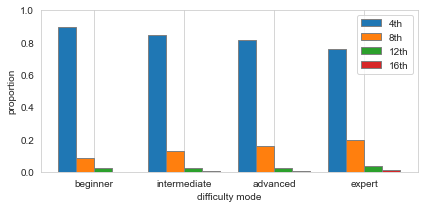

In [2]:
df = pd.read_csv("experimental_data/note_stats.csv")

h_4 = df["4th_notes_d"]
h_8 = df["8th_notes_d"]
h_12 = df["12th_notes_d"]
h_16 = df["16th_notes_d"]

bar_width = 0.2
xs = np.arange(len(h_4))
x_4 = [x - 1.5*bar_width for x in xs]
x_8 = [x - 0.5*bar_width for x in xs]
x_12 = [x + 0.5*bar_width for x in xs]
x_16 = [x + 1.5*bar_width for x in xs]

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.bar(x_4, h_4, width=bar_width, edgecolor="gray", label="4th")
ax.bar(x_8, h_8, width=bar_width, edgecolor="gray", label="8th")
ax.bar(x_12, h_12, width=bar_width, edgecolor="gray", label="12th")
ax.bar(x_16, h_16, width=bar_width, edgecolor="gray", label="16th")

ax.set_xlabel("difficulty mode")
ax.set_xticks(xs)
ticklabels = ["beginner", "intermediate", "advanced", "expert"]
ax.set_xticklabels(ticklabels)
ax.set_ylabel("proportion")
ax.set_ylim([0., 1.])
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.legend()

fig.tight_layout()
plt.show()

## Figure 8

The result of multi-scale conv-stack analysis.

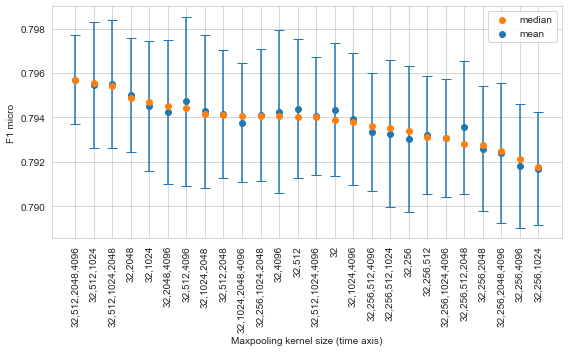

In [3]:
df = pd.read_csv("experimental_data/multi_scale_convstack.csv", index_col="maxpool_timescale_train")

x = df.index
y_med = df["f1_median"]
y_mean = df["f1_mean"]
y_std = df["f1_std"]

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x, y_med, label="median", color="tab:orange", zorder=3)
ax.scatter(x, y_mean, label="mean", color="tab:blue", zorder=2)
ax.errorbar(x, y_mean, yerr=y_std, capsize=5., color="tab:blue", fmt=" ", zorder=1)
ax.tick_params(axis="x", labelrotation=90)
ax.set_xlabel("Maxpooling kernel size (time axis)")
ax.set_ylabel("F1 micro")
ax.legend()

fig.tight_layout()
plt.show()


## Figure 9

Comparison between the presented model and the model without beat guide.

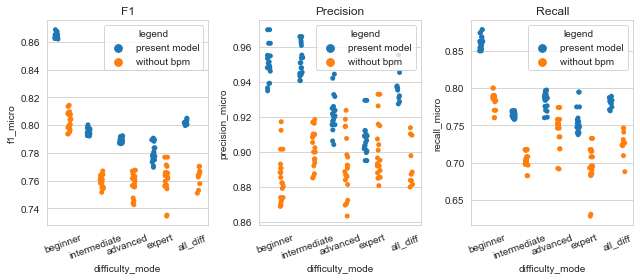

In [4]:
def plot_results(plot_df, title, diff_list, average="micro"):
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(9, 4))
    
    # ax0
    sns.stripplot(
        x="difficulty_mode",
        y=f"f1_{average}",
        data=plot_df,
        hue="legend",
        order=diff_list,
        jitter=True,
        dodge=True,
        ax=ax0,
    )
    ax0.set_title("F1")
    
    # ax1
    sns.stripplot(
        x="difficulty_mode",
        y=f"precision_{average}",
        data=plot_df,
        hue="legend",
        order=diff_list,
        jitter=True,
        dodge=True,
        ax=ax1,
    )
    ax1.set_title("Precision")
    
    # ax2
    sns.stripplot(
        x="difficulty_mode",
        y=f"recall_{average}",
        data=plot_df,
        hue="legend",
        order=diff_list,
        jitter=True,
        dodge=True,
        ax=ax2,
    )
    ax2.set_title("Recall")

    for ax in [ax0, ax1, ax2]:
        for tick in ax.get_xticklabels():
            tick.set_rotation(20)

    fig.tight_layout()
    plt.show()
    
present_df = pd.read_csv("experimental_data/presented_model.csv")
bpm_df = pd.read_csv("experimental_data/bpm_omitted.csv")
present_df["legend"] = "present model"
bpm_df["legend"] = "without bpm"
plot_df = pd.concat([present_df, bpm_df])

general_diffname = {
    'easy': 'beginner',
    'hard': 'intermediate',
    'expert': 'advanced',
    'expertplus': 'expert',
    'all_diff': 'all_diff',
}
plot_df["difficulty_mode"] = plot_df.apply(lambda row: general_diffname[row.difficulty_result], axis=1)
diff_names = [v for k, v in general_diffname.items()]
plot_results(plot_df, title="", diff_list=diff_names)


## Figure 10

Comparison between the presented model and the model trained each difficulty mode separately.

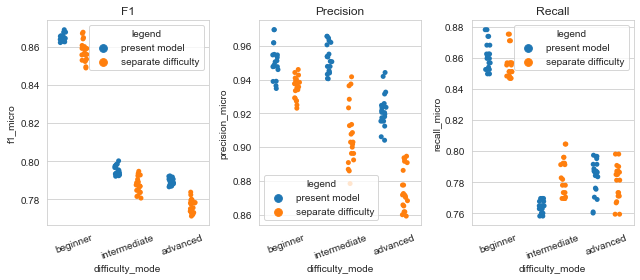

In [5]:
display(HTML(f"<h3>Plot</h3>"))
present_df = pd.read_csv("experimental_data/presented_model.csv")
diff_df = pd.read_csv("experimental_data/train_diff_separately.csv")

diff_name_to_value = {
    'easy': 10,
    'hard': 20,
    'expert': 30,
    'expertplus': 40,
    'all_diff': "",
}
present_df["legend"] = "present model"
diff_df["legend"] = "separate difficulty"
diff_df["difficulty_res_value"] = diff_df.apply(
    lambda row: diff_name_to_value[row["difficulty_result"]], axis=1)
diff_df = diff_df[diff_df["difficulty_res_value"] == diff_df["difficulty"]]
plot_df = pd.concat([present_df, diff_df])

general_diffname = {
    'easy': 'beginner',
    'hard': 'intermediate',
    'expert': 'advanced',
    'expertplus': 'expert',
    'all_diff': 'all_diff',
}
plot_df["difficulty_mode"] = plot_df.apply(lambda row: general_diffname[row.difficulty_result], axis=1)
diff_names = [v for k, v in general_diffname.items()][:-2]  # exclude "all_diff" and highest difficulty mode
plot_df = plot_df[plot_df["difficulty_mode"].isin(diff_names)]
fig = plot_results(plot_df, title="", diff_list=diff_names)


## Figure 12

The study about an effect of maxpooling kernel size.

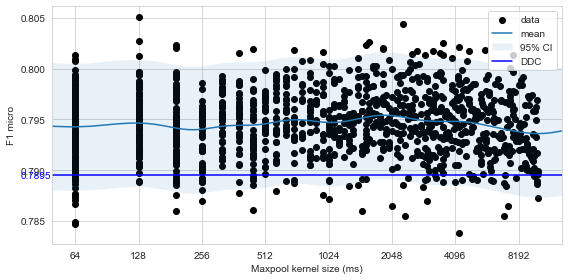

In [6]:
ddc_f1 = {
    "beginner": 0.8537,
    "intermediate": 0.7842,
    "advanced": 0.7733,
    "expert": 0.7769,
    "all_diff": 0.7895,
}

def plot(X, y, model, X_min, X_max, ddc_score):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_xscale("log")
    ax.set_xlabel("Maxpool kernel size (ms)")
    ax.set_ylabel("F1 micro")
    
    # plot data points
    ax.scatter(X, y, c="k", label="data")
    
    # plot predictions of a GP regression
    xlim = ax.get_xlim()
    X_grid = np.linspace(xlim[0], xlim[1], num=1000)
    mean, var = model.predict(np.log(X_grid)[:, None])
    quantiles = model.predict_quantiles(np.log(X_grid)[:, None])
    ax.plot(X_grid, mean.flatten(), label="mean")
    ax.fill_between(X_grid, quantiles[0].flatten(), quantiles[1].flatten(), alpha=0.1, label="95% CI")
    
    # plot performances of the ddc conv
    ax.axhline(y=ddc_score, c="b", label="DDC")
    ax.text(xlim[0]-0.05*np.log(xlim[1]-xlim[0]), ddc_score, str(ddc_score), color="b", ha="right", va="center")
    
    xticks = [64, 128, 256, 512, 1024, 2048, 4096, 8192]
    ax.set_xticks(ticks=xticks, labels=xticks)
    
    ax.set_xlim(xlim)
    ax.legend()
    fig.tight_layout()
    plt.show()
    
df = pd.read_csv("experimental_data/maxpooling_kernel_size.csv")
df = df[df["difficulty_mode"]=="all_diff"]

X_obs = df["maxpool_timescale_train"].values
log_X_obs = np.log(X_obs)
y_obs = df["f1_micro"].values

# fit by Gaussian process regression
lengthscale = 0.3
kernel = GPy.kern.RBF(1, lengthscale=lengthscale, variance=1)
model = GPy.models.GPRegression(
    log_X_obs[:, None], y_obs[:, None],
    kernel=kernel,
    mean_function=GPy.mappings.Constant(input_dim=1, output_dim=1, value=y_obs.mean()),
)
sigma = y_obs.std()
model.Gaussian_noise.variance = sigma ** 2
model.Gaussian_noise.variance.fix()
model.rbf.lengthscale.fix()
model.optimize()

fig = plot(X_obs, y_obs, model, 32, 8192*2, ddc_f1["all_diff"])
